<a href="https://colab.research.google.com/github/PrajwalPPatil/cognifyz_level3_RestaurantDatasetAnalysis/blob/main/Cognifyz_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1:Predictive Modeling

# 1.Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2.Load Dataset

In [2]:
#Loading Dataset
data=pd.read_csv('/content/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# 3.Handle Missing Values

In [3]:
#To check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
#Handle missing values
#Fill missing values in "Cuisine" column with mode
Mode_cuisines=data['Cuisines'].mode()[0]
data['Cuisines'].fillna(Mode_cuisines,inplace=True)
print(f'Missing values in "Cuisines" column after filling with mode: {data["Cuisines"].isnull().sum()}')

Missing values in "Cuisines" column after filling with mode: 0


<ipython-input-4-f79691e1954b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cuisines'].fillna(Mode_cuisines,inplace=True)


# 4.Convert categorical variable to numeric

In [5]:
# Convert categorical variables to numeric using one-hot encoding
# Check categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [6]:
len (categorical_columns)

13

In [7]:
# Apply One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Confirm no more object columns exist
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Columns: 20829 entries, Restaurant ID to Rating text_Very Good
dtypes: bool(20821), float64(3), int64(5)
memory usage: 190.2 MB
None


# 5.Define Feature & Target Variable

In [8]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Aggregate rating'])  # Exclude the target column
y = data['Aggregate rating']

# 6.Split Dataset

In [9]:
#Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7.Train Models

# a.Linear Regression

In [10]:
#Train Models
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}")

Linear Regression Performance:
MSE: 0.09198837740477406, MAE: 0.23574139065082086, R2: 0.9595852493020265


# b.Decision Trees

In [11]:
# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, R2: {r2_dt}")

Decision Tree Performance:
MSE: 0.047828362114076386, MAE: 0.13751962323390893, R2: 0.97898678740003


# c.Random Forest

In [12]:
# Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

Random Forest Performance:
MSE: 0.027057549973835616, MAE: 0.10863212977498675, R2: 0.9881123662842891


# 8.Compare Model Performance

<ipython-input-13-6bacd2c030dd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='viridis')
<ipython-input-13-6bacd2c030dd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette='plasma')
<ipython-input-13-6bacd2c030dd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='coolwarm')


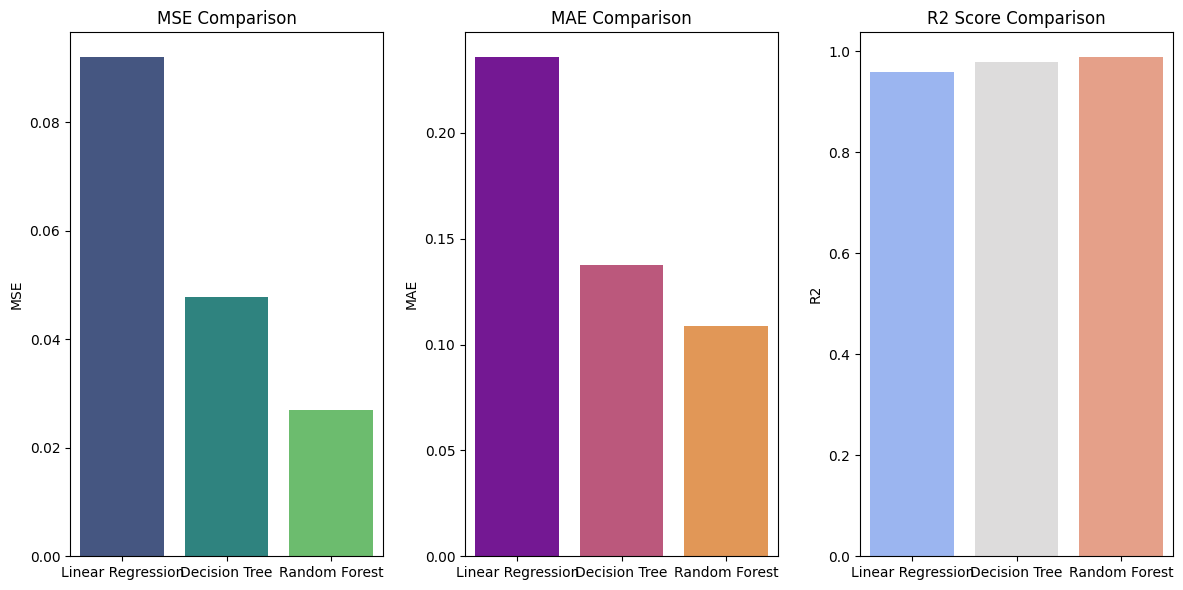

In [13]:
#Compare Model Performance
# Compare metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_dt, mse_rf]
mae_values = [mae_lr, mae_dt, mae_rf]
r2_values = [r2_lr, r2_dt, r2_rf]

# Plot comparison
plt.figure(figsize=(12, 6))

# MSE Comparison
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('MSE Comparison')
plt.ylabel('MSE')

# MAE Comparison
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mae_values, palette='plasma')
plt.title('MAE Comparison')
plt.ylabel('MAE')

# R2 Score Comparison
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values, palette='coolwarm')
plt.title('R2 Score Comparison')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

# Task2:Customer Preference Analysis

# 1.Import Libraries

In [14]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Load Dataset

In [ ]:
#Loading Dataset
data=pd.read_csv('/content/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# 3.Handle Missing Values

In [ ]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#Handle missing values
#Fill missing values in "Cuisine" column with mode
Mode_cuisines=data['Cuisines'].mode()[0]
data['Cuisines'].fillna(Mode_cuisines,inplace=True)
print(f'Missing values in "Cuisines" column after filling with mode: {data["Cuisines"].isnull().sum()}')

Missing values in "Cuisines" column after filling with mode: 0


# 4.Display Topmost  Cuisines,average_rating & total_votes

In [ ]:
# Focus on relevant columns (assuming 'cuisine', 'aggregate_rating', 'votes' exist)
relevant_columns = ['Cuisines', 'Aggregate rating', 'Votes']
data = data[relevant_columns]

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
#Aggregate rating
#Calculate average rating & total votes by cuisines
cuisine_analysis = data.groupby('Cuisines').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()

In [ ]:
# Sort by popularity (total votes)
cuisine_analysis = cuisine_analysis.sort_values(by='total_votes', ascending=False)

In [ ]:
# Display top 10 cuisines by popularity
print(cuisine_analysis.head(10))

                            Cuisines  average_rating  total_votes
1514           North Indian, Mughlai        2.888623        53747
1306                    North Indian        1.693228        48967
1329           North Indian, Chinese        2.421722        42012
331                             Cafe        2.890970        30657
497                          Chinese        2.042090        21925
1520  North Indian, Mughlai, Chinese        2.568528        20115
828                        Fast Food        2.118362        17852
1699                    South Indian        2.370536        16433
1288           Mughlai, North Indian        2.091667        15275
1031                         Italian        3.657407        14799


# 5.Top 10 Cuisines by total_votes

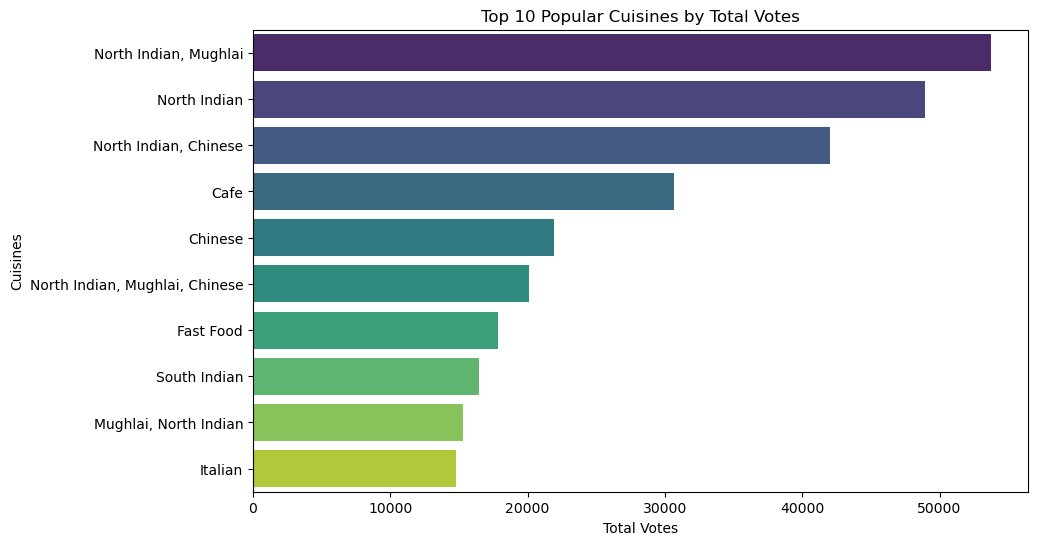

In [ ]:
#Visualization:
# Plot most popular cuisines by total votes
plt.figure(figsize=(10, 6))
sns.barplot(x='total_votes', y='Cuisines', data=cuisine_analysis.head(10), palette='viridis')
plt.title('Top 10 Popular Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisines')
plt.show()

# 6.Top 10 Cuisines by avg. rating

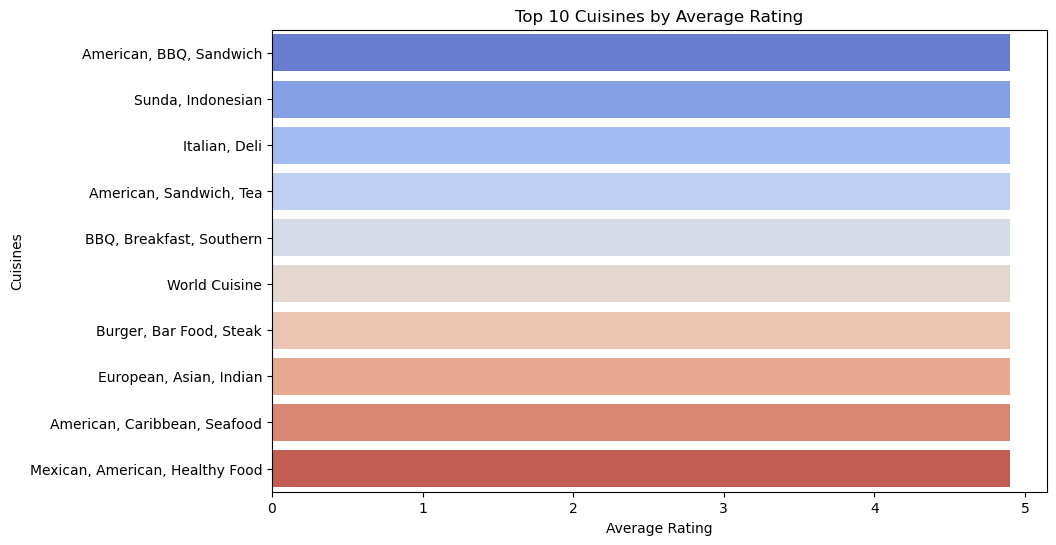

In [ ]:
# Plot average ratings for cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='Cuisines', data=cuisine_analysis.sort_values(by='average_rating', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.show()

# 7.Correlation Analysis

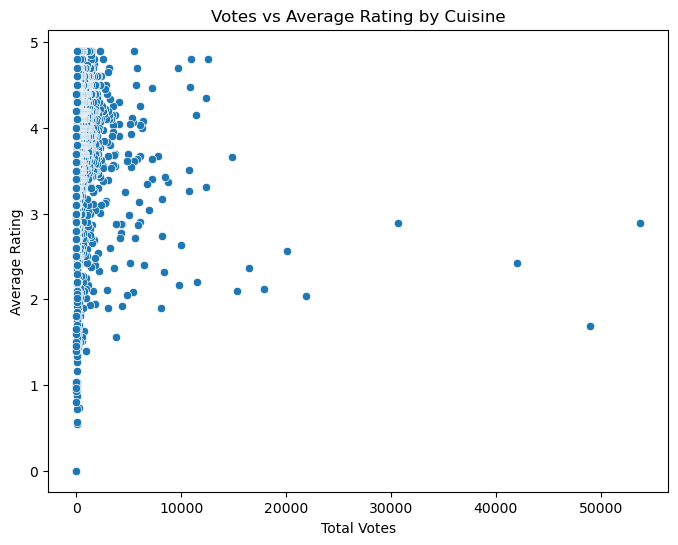

In [ ]:
# Correlation Analysis
# Scatter plot to check correlation between votes and average rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_votes', y='average_rating', data=cuisine_analysis)
plt.title('Votes vs Average Rating by Cuisine')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()

# Task3: Data Visualization

# 1.Import Libraries

In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Load Dataset

In [ ]:
#Loading Dataset
data=pd.read_csv('/content/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# 3.Handle Missing Values

In [ ]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#Handle missing values
#Fill missing values in "Cuisine" column with mode
Mode_cuisines=data['Cuisines'].mode()[0]
data['Cuisines'].fillna(Mode_cuisines,inplace=True)
print(f'Missing values in "Cuisines" column after filling with mode: {data["Cuisines"].isnull().sum()}')

Missing values in "Cuisines" column after filling with mode: 0


In [ ]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# 4.Distribution of rating

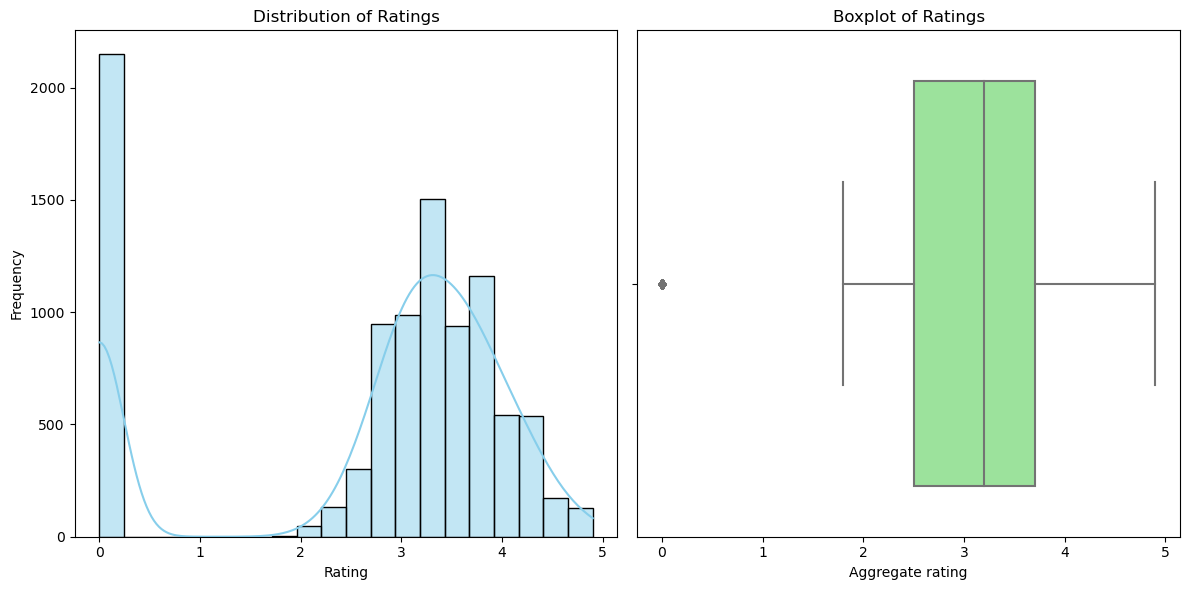

In [ ]:
#1. Distribution of Ratings (using a Histogram and Boxplot)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is the DataFrame containing the data with a column "rating"
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Aggregate rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Aggregate rating'], color='lightgreen')
plt.title('Boxplot of Ratings')

plt.tight_layout()
plt.show()

# 5.Avg rating of diff Cuisines

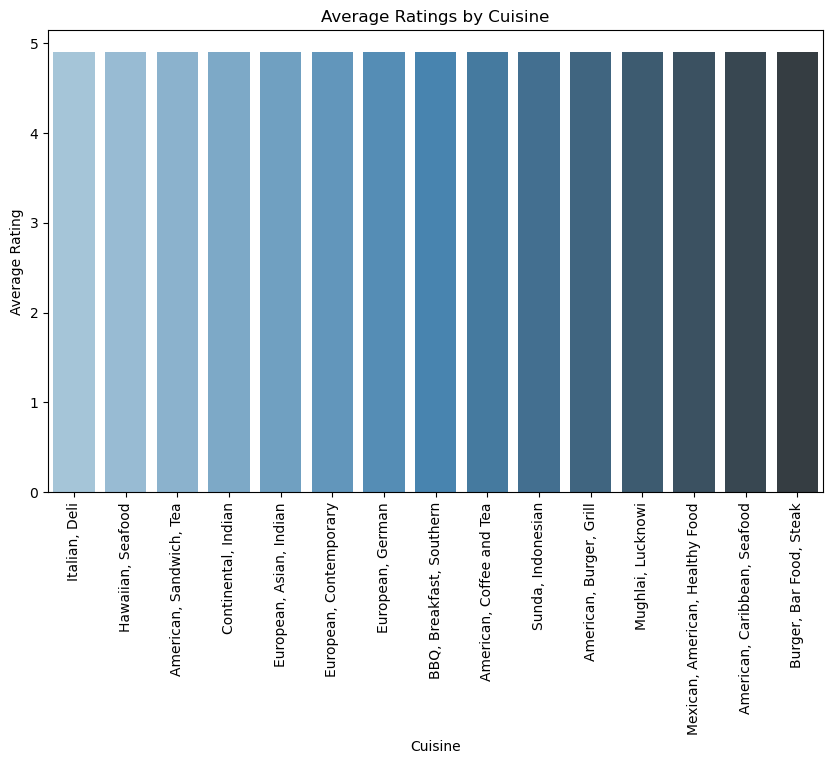

In [ ]:
#2. Average Ratings of Different Cuisines (Bar Plot)
# Assuming 'cuisine' is the column representing the type of cuisine
avg_rating_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_cuisine.head(15).index, y=avg_rating_cuisine.head(15).values, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

# 6.Avg rating of diff Cities

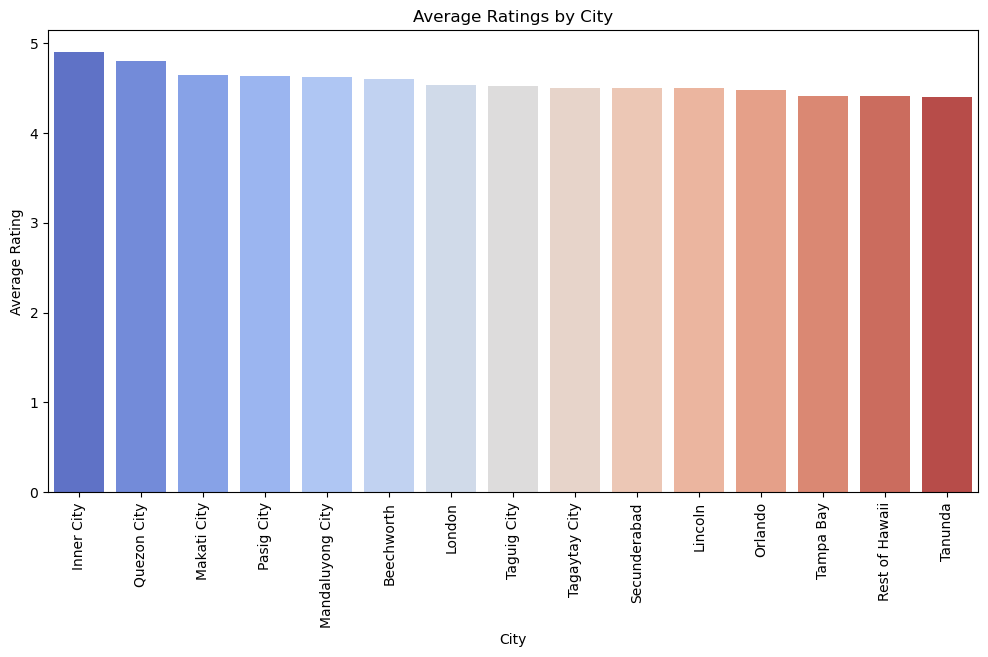

In [ ]:
#3. Average Ratings of Different Cities (Bar Plot)
# Assuming 'city' is the column representing different cities
avg_rating_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_city.head(15).index, y=avg_rating_city.head(15).values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

# 7.Price vs rating

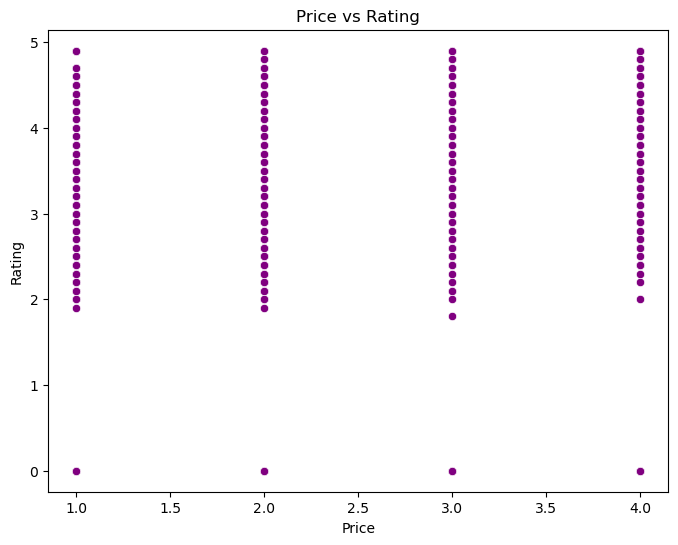

In [ ]:
#4. Relationship Between Features and Target Variable (Rating)
#a) Feature vs Rating (Scatter Plot for continuous features)
#For numerical features like price, votes, or area, scatter plots can reveal the relationship with ratings.# Scatter Plot: Price vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price range'], y=data['Aggregate rating'], color='purple')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# 8.Votes vs rating

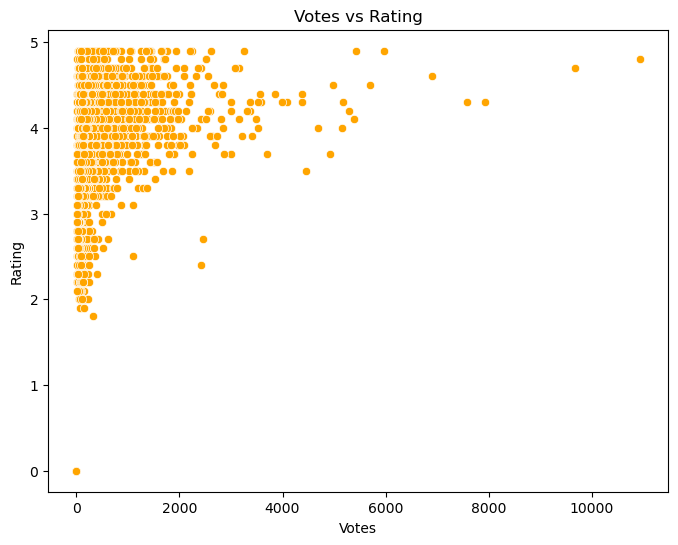

In [ ]:
# Scatter Plot: Votes vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'], color='orange')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# 9.Cuisines vs rating

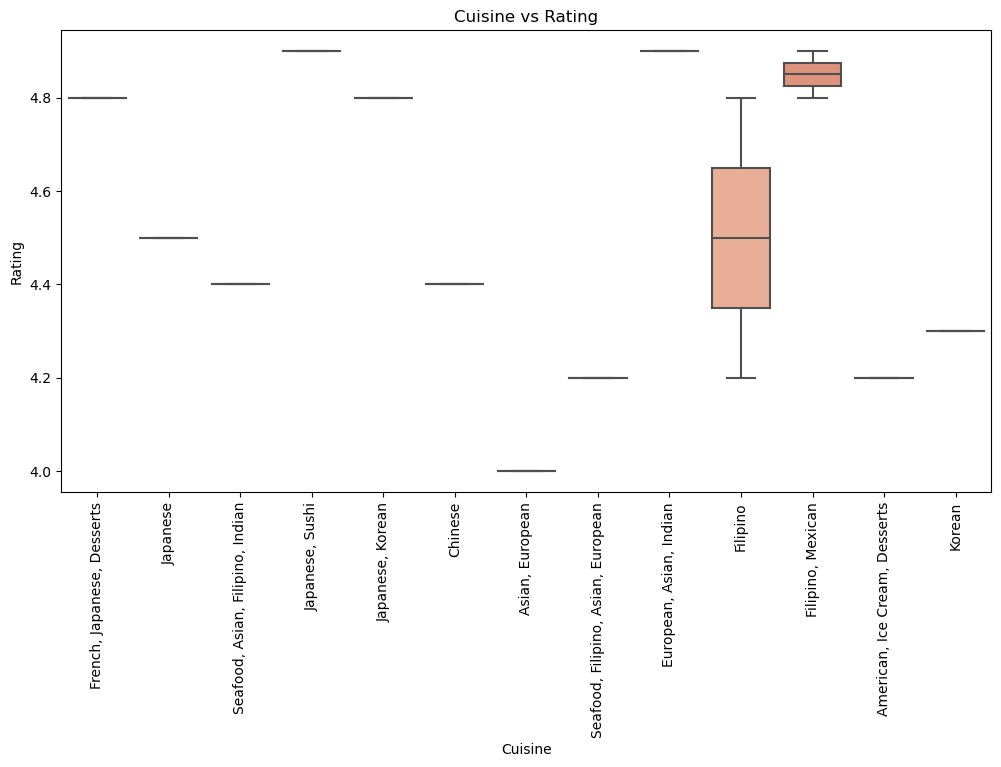

In [ ]:
#b) Categorical Feature vs Rating (Boxplot for categorical features)
#For categorical features such as cuisine or city, boxplots can provide insight into how ratings differ across categories
# Boxplot: Cuisine vs Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data.head(15), palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Cuisine vs Rating')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.show()

# 10.City vs rating

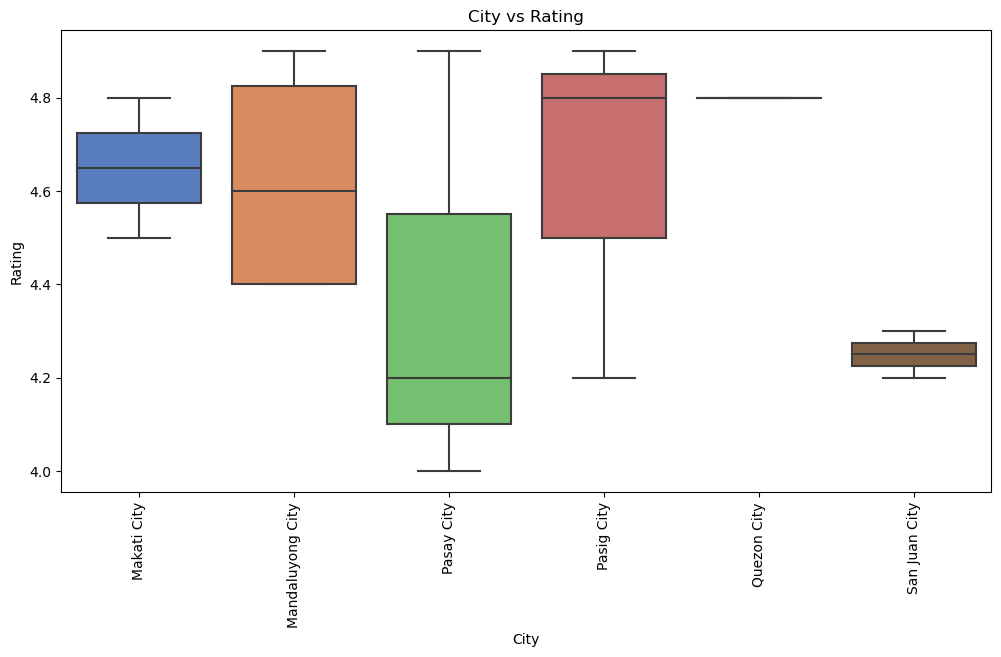

In [ ]:
10.City vs rating

# 11.Correlation Matrix

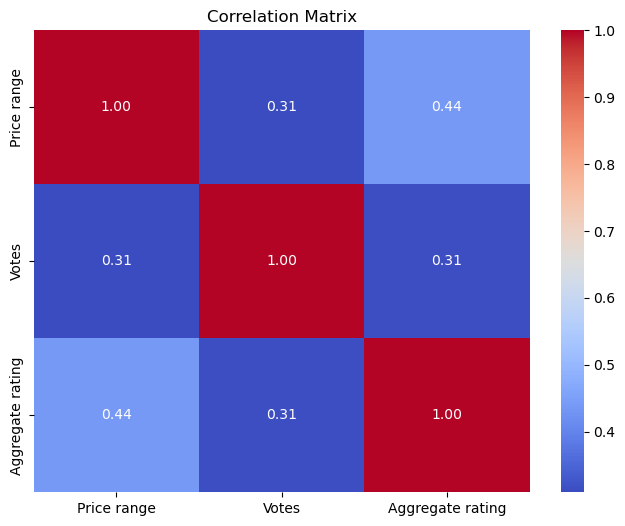

In [ ]:
#c) Correlation Matrix (Heatmap)
#For numerical features like price, votes, and rating, a heatmap can show the correlations between features.
# Correlation Matrix Heatmap
correlation = data[['Price range', 'Votes', 'Aggregate rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()